In [1]:
import os
import sys

import random
import numpy as np
import pandas as pd

In [2]:
def design_spatloc():
    """
    Design the spatial location of the stimuli.
    """
    locations = ["left", "right", "top", "bottom"]
    movement = ["in", "out", "stutter"]
    # Create a list of all combinations of locations and movements
    combinations = [(loc, mov) for loc in locations for mov in movement]
    # Shuffle the combinations
    random.shuffle(combinations)
    # Create a DataFrame with the combinations
    df = pd.DataFrame(combinations, columns=["location", "movement"])

    return df

In [12]:
sl = design_spatloc()

sl

,location,movement
0,right,stutter
1,left,in
2,right,in
3,left,stutter
4,bottom,in
5,top,in
6,right,out
7,top,out
8,left,out
9,top,stutter


In [ ]:
# spawn_range = np.random.uniform(0, 360)
# spawn_range = np.(0, 360)

# Sample random integers between a specified range
inner_bound = self.session.config.occluder.radius * 0.5 + self.session.config.ball.radius
outer_bound = self.session.display.square_size - self.session.config.ball.radius


spawn_range = np.random.randint(0, 360, size=10)

spawn_range

array([331,  90, 108, 217, 235, 311,  38, 104, 206, 357])

In [93]:
phase_duration = 12
stutter_dur = 0.5
stutter_interval = 0.5
n_events = int(phase_duration // (stutter_interval + stutter_dur))

print(n_events)
event_start_moments = -(12 - np.linspace(0, (phase_duration - stutter_dur - stutter_interval), n_events))

event_start_moments 

# Compute event end moments
# event_end_moments = np.linspace(0, phase_duration, n_events) + stutter_dur




12


array([-12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,
        -1.])

In [100]:
spatloc_dur = ((12 * 16) + 12 * 5)

# express in minutes
spatloc_dur = spatloc_dur / 60
print(spatloc_dur)

4.2


In [113]:
n_stutters = 30
inner_bound = 10
outer_bound = 90
spawn_range = np.random.randint(inner_bound, outer_bound, size=(n_stutters // 3))

spawn_range_trip = [[i] * 3 for i in spawn_range]

np.array(spawn_range_trip).reshape(-1, 1).flatten()

array([53, 53, 53, 89, 89, 89, 59, 59, 59, 72, 72, 72, 66, 66, 66, 13, 13,
       13, 89, 89, 89, 37, 37, 37, 32, 32, 32, 66, 66, 66])

[521 521 521 447 447 447 494 494 494 372 372 372 360 360 360 413 413 413
 508 508 508 471 471 471 433 433 433 538 538 538]


(array([3., 3., 0., 0., 0., 3., 0., 0., 3., 3., 0., 0., 3., 0., 0., 3., 3.,
        0., 3., 3.]),
 array([360. , 368.9, 377.8, 386.7, 395.6, 404.5, 413.4, 422.3, 431.2,
        440.1, 449. , 457.9, 466.8, 475.7, 484.6, 493.5, 502.4, 511.3,
        520.2, 529.1, 538. ]),
 <BarContainer object of 20 artists>)

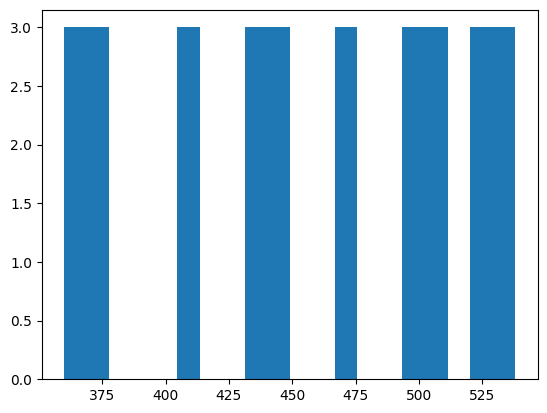

In [182]:
import numpy as np
import matplotlib.pyplot as plt
def generate_separated_numbers(inner_bound, outer_bound, n_numbers, min_distance):
    numbers = []
    while len(numbers) < n_numbers:
        # Generate a random number within the bounds
        candidate = np.random.randint(inner_bound, outer_bound)
        
        # Check if the candidate is sufficiently far from all previously selected numbers
        if all(abs(candidate - num) >= min_distance for num in numbers):
            numbers.append(candidate)
    
    return np.array(numbers)

# inner_bound = self.session.config.occluder.radius * // 2 # self.session.config.ball.radius
# outer_bound = self.session.config.display.square_size // 2 # - self.session.config.ball.radius

# Example usage:
inner_bound = 360
outer_bound = 540
n_stutters = 30
min_distance = 12  # Set the minimum distance between numbers

# Generate separated spawn locations
spawn_range_locs = generate_separated_numbers(inner_bound, outer_bound, n_stutters // 3, min_distance)

# Repeat the spawn range
spawn_range = np.repeat(spawn_range_locs, 3)

print(spawn_range)

plt.hist(spawn_range, bins=20)


[523 523 523 383 383 383 552 552 552 490 490 490 369 369 369 449 449 449
 397 397 397 474 474 474 345 345 345 419 419 419]


(array([3., 0., 3., 3., 0., 3., 0., 3., 0., 0., 3., 0., 3., 0., 3., 0., 0.,
        3., 0., 3.]),
 array([345.  , 355.35, 365.7 , 376.05, 386.4 , 396.75, 407.1 , 417.45,
        427.8 , 438.15, 448.5 , 458.85, 469.2 , 479.55, 489.9 , 500.25,
        510.6 , 520.95, 531.3 , 541.65, 552.  ]),
 <BarContainer object of 20 artists>)

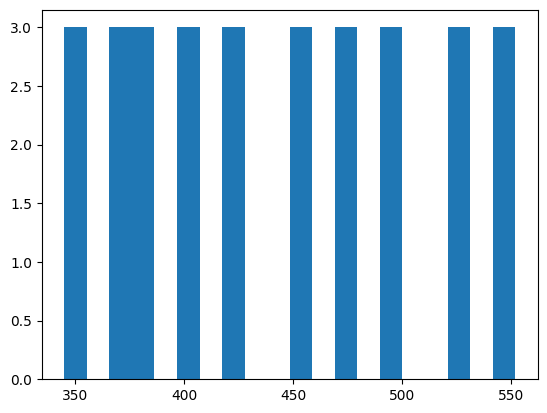

In [423]:
import numpy as np

def generate_separated_numbers(
    inner_bound, outer_bound, n_numbers,
    min_distance, subsequent_min_distance,
    max_attempts_per_sample=10000
):
    numbers = []
    attempts = 0
    while len(numbers) < n_numbers:
        candidate = np.random.randint(inner_bound, outer_bound)
        
        # Check globale afstand
        global_ok = all(abs(candidate - num) >= min_distance for num in numbers)
        
        # Check lokale afstand
        if numbers:
            local_ok = abs(candidate - numbers[-1]) >= subsequent_min_distance
        else:
            local_ok = True  # eerste getal hoeft geen lokale check

        if global_ok and local_ok:
            numbers.append(candidate)
            attempts = 0  # reset attempts na succes
        else:
            attempts += 1
            if attempts >= max_attempts_per_sample:
                raise ValueError(
                    f"Failed to generate {n_numbers} separated numbers with min_distance={min_distance} "
                    f"and subsequent_min_distance={subsequent_min_distance}. "
                    f"Try relaxing the constraints or increasing the range."
                )
    return np.array(numbers)

# Example usage
inner_bound = 345
outer_bound = 555
n_stutters = 30
min_distance = 10
subsequent_min_distance = 50  # groter dan min_distance

spawn_range_locs = generate_separated_numbers(
    inner_bound, outer_bound, n_stutters // 3,
    min_distance, subsequent_min_distance
)
spawn_range = np.repeat(spawn_range_locs, 3)

print(spawn_range)
plt.hist(spawn_range, bins=20)

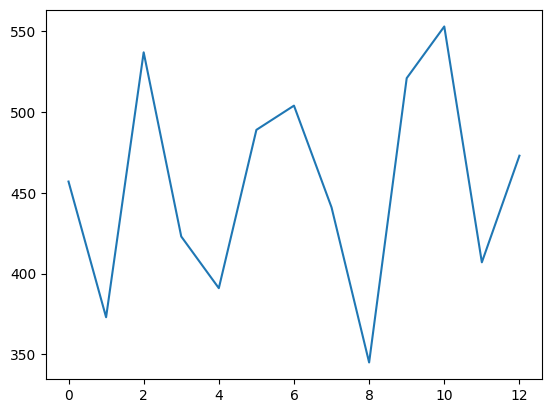

In [846]:
def generate_evenly_spread_separated_numbers(
    inner_bound, outer_bound, n_numbers,
    min_distance, subsequent_min_distance,
    jitter_within_segment=True,
    max_attempts_per_sample=1000
):
    segment_size = (outer_bound - inner_bound) / n_numbers
    numbers = []
    attempts = 0

    for i in range(n_numbers):
        segment_start = inner_bound + i * segment_size
        segment_end = segment_start + segment_size

        for attempt in range(max_attempts_per_sample):
            if jitter_within_segment:
                candidate = np.random.uniform(segment_start, segment_end)
            else:
                candidate = (segment_start + segment_end) / 2  # midden van segment
            candidate = int(candidate)

            # Check globale afstand
            global_ok = all(abs(candidate - num) >= min_distance for num in numbers)
            # Check lokale afstand
            if numbers:
                local_ok = abs(candidate - numbers[-1]) >= subsequent_min_distance
            else:
                local_ok = True  # eerste getal hoeft geen lokale check

            if global_ok and local_ok:
                numbers.append(candidate)
                break  # succesvol
        else:
            raise ValueError(
                f"Failed to generate {n_numbers} separated numbers with min_distance={min_distance} "
                f"and subsequent_min_distance={subsequent_min_distance} after {max_attempts_per_sample} attempts "
                f"within segment {i}. Try relaxing constraints or increasing range."
            )

    # Eventueel shufflen
    arr = np.array(numbers)
    np.random.shuffle(arr)
    return arr


min_distance = 0
subsequent_min_distance = 15
stut_per_loc = 3
spawn_range_locs = generate_evenly_spread_separated_numbers(inner_bound, outer_bound, (n_stutters // stut_per_loc) + stut_per_loc, 
                                                min_distance, subsequent_min_distance) # + margin of stutperloc
# spawn_range_locs = generate_evenly_spread_separated_numbers(inner_bound, outer_bound, n_stutters + stut_per_loc, 
                                                # min_distance, subsequent_min_distance) # + margin of stutperloc


# plt.hist(spawn_range_locs, bins=20)
plt.plot(spawn_range_locs)

[14 14 14 23 23 23 32 32 32 41 41 41 50 50 50 59 59 59 68 68 68 77 77 77
 86 86 86 95 95 95]


(array([3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 0., 3., 0., 3., 0., 3., 0.,
        3., 0., 3.]),
 array([14.  , 18.05, 22.1 , 26.15, 30.2 , 34.25, 38.3 , 42.35, 46.4 ,
        50.45, 54.5 , 58.55, 62.6 , 66.65, 70.7 , 74.75, 78.8 , 82.85,
        86.9 , 90.95, 95.  ]),
 <BarContainer object of 20 artists>)

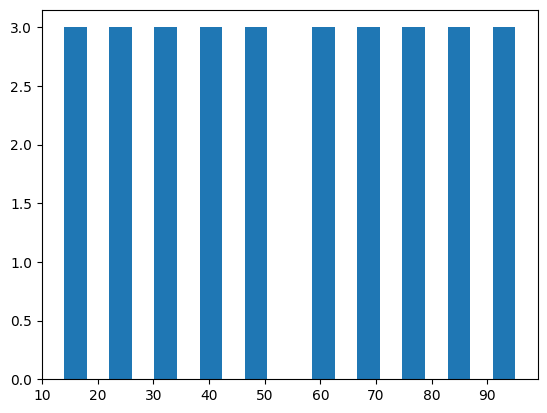

In [271]:
import numpy as np

def generate_evenly_spread_numbers(inner_bound, outer_bound, n_numbers, jitter_within_segment=True):
    segment_size = (outer_bound - inner_bound) / n_numbers
    numbers = []
    
    for i in range(n_numbers):
        segment_start = inner_bound + i * segment_size
        segment_end = segment_start + segment_size
        
        if jitter_within_segment:
            candidate = np.random.uniform(segment_start, segment_end)
        else:
            candidate = (segment_start + segment_end) / 2  # midden van segment
        
        numbers.append(int(candidate))
    
    return np.array(numbers)

# Example usage
inner_bound = 10
outer_bound = 100
n_stutters = 30

spawn_range_locs = generate_evenly_spread_numbers(inner_bound, outer_bound, n_stutters // 3, False)
spawn_range = np.repeat(spawn_range_locs, 3)

print(spawn_range)
plt.hist(spawn_range, bins=20)

In [ ]:


import numpy as np

n_stutters = 30
inner_bound = 10
outer_bound = 90

spawn_range = np.random.randint(inner_bound, outer_bound, size=(n_stutters // 3))
result = np.repeat(spawn_range, 3)

result

array([50, 50, 50, 84, 84, 84, 48, 48, 48, 28, 28, 28, 15, 15, 15, 43, 43,
       43, 69, 69, 69, 17, 17, 17, 60, 60, 60, 27, 27, 27])

In [863]:


yaml = ruamel.yaml.YAML()
data = yaml.load(open('exp.yml'))

requirements = []
for dep in data['dependencies']:
    if isinstance(dep, str):
        package, package_version, python_version = dep.split('=')
        if python_version == '0':
            continue
        requirements.append(package + '==' + package_version)
    elif isinstance(dep, dict):
        for preq in dep.get('pip', []):
            requirements.append(preq)

with open('requirements_export.txt', 'w') as fp:
    for requirement in requirements:
       print(requirement, file=fp)

ValueError: not enough values to unpack (expected 3, got 2)

In [93]:
import random

button_options = ["left", "right"]
button_order = random.sample(button_options, len(button_options))
button_order

[button_order[0]] * 10 + [button_order[1]] * 10

# import pandas as pd
# kak = pd.read_csv("/Users/wieger.scheurer/exp_venv/lib/python3.10/site-packages/exptools2/experiments/physicspred/logs/sub-soepstengel_design_matrix.tsv")


button_options.index("left")  # returns the index of "left" in button_options

0

### Design matrix check fMRI

In [2]:
from functions.utilities import (build_design_matrix, check_balance)
from omegaconf import OmegaConf


In [98]:
ui = "sokkel_1"

ui[:-2]

'sokkel'

In [95]:
total = 320
runs = 4

trials_per_run = total // runs

def trial_subset(total_trials, runs, this_run):
    """
    Get the trial subset for a given trial number.
    N.B. 1-based indexing is used for `this_run`.
    """
    trials_per_run = total_trials // runs
    if this_run < 1 or this_run > runs:
        raise ValueError(f"this_run must be between 1 and {runs}, got {this_run}")

    start = trials_per_run * (this_run - 1)
    end = start + trials_per_run


    return list(range(start, end))


trial_subset = trial_subset(320, 4, 3)

trial_subset

[160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239]

In [86]:

phase_names = ["fixation", "interactor", "occluder", "ball_movement", "iti"]

# if self.dmx["task_prompt"][trial_nr]:
# Add task prompt phase if enabled
pd = [0.1, 0.7, 0.2, 0.3, 0.8]  # durations for each phase

# phase_durations.append(self.config.timing.task_prompt_dur)
# Add task prompt phase name
# phase_names = phase_names + ["task_prompt"]
pd.insert(4, 9.9)
pd

phase_names.insert(4, "task_prompt")

phase_names

phase_names.extend(["kont", "gat"])
phase_names


kak = np.zeros((4, 8))

kak[:]

for i in range(320):
    print(i) if i % 22 == 0 else None

ga = 9.12421

int(ga)

0
22
44
66
88
110
132
154
176
198
220
242
264
286
308


9

In [4]:
n_trials = 32

# Load configuration file
config_path = "/Users/wieger.scheurer/exp_venv/lib/python3.10/site-packages/exptools2/experiments/physicspred/behav_settings.yml"
config = OmegaConf.load(config_path)

design_matrix = build_design_matrix(
        n_trials=n_trials,
        change_ratio=[True, False],
        ball_color_change_mean=config.ball.color_change_mean,
        # ball_color_change_mean=-10, # Debug for ball colour change
        ball_color_change_sd=config.ball.color_change_sd,
        verbose=False,
        neg_bias_factor=config.ball.neg_bias_factor,
        neg_bias_shift=config.ball.neg_bias_shift,
        # fmri_task = True,
        # prompt_every = 10
    )
    

check_balance(design_matrix)

design_matrix

Number of trials per full matrix: 320
Total trials: 32

Trial type balance:
trial_type
interactor    16
empty         16
Name: count, dtype: int64

Trial option balance for interactor trials:
trial_option
135_bottom_d    2
135_bottom_r    2
135_top_l       2
135_top_u       2
45_bottom_d     2
45_bottom_l     2
45_top_r        2
45_top_u        2
Name: count, dtype: int64
Variance: 0.00

Trial option balance for empty trials:
trial_option
none_d    4
none_l    4
none_r    4
none_u    4
Name: count, dtype: int64
Variance: 0.00

Bounce balance:
bounce
False    16
True     16
Name: count, dtype: int64

Ball change balance:
ball_change
True     16
False    16
Name: count, dtype: int64

Ball luminance balance:
ball_luminance
-0.188    3
-0.104    5
 0.000    3
 0.060    3
 0.120    2
Name: count, dtype: int64

Cross-tabulation of bounce × ball_luminance_change:
ball_luminance  -0.188  -0.104   0.000   0.060   0.120
bounce                                                
False                

,trial_type,trial_option,bounce,phant_bounce_direction,ball_change,ball_luminance
0,interactor,135_bottom_r,False,None,True,-0.188
1,interactor,135_bottom_r,False,None,True,-0.104
2,empty,none_d,False,None,True,-0.188
3,empty,none_d,True,left,False,NaN
4,interactor,45_top_r,True,None,True,-0.104
5,empty,none_r,True,left,False,NaN
6,empty,none_d,False,None,True,0.000
7,empty,none_u,True,left,False,NaN
8,interactor,135_top_l,False,None,False,NaN
9,interactor,45_top_u,False,None,False,NaN


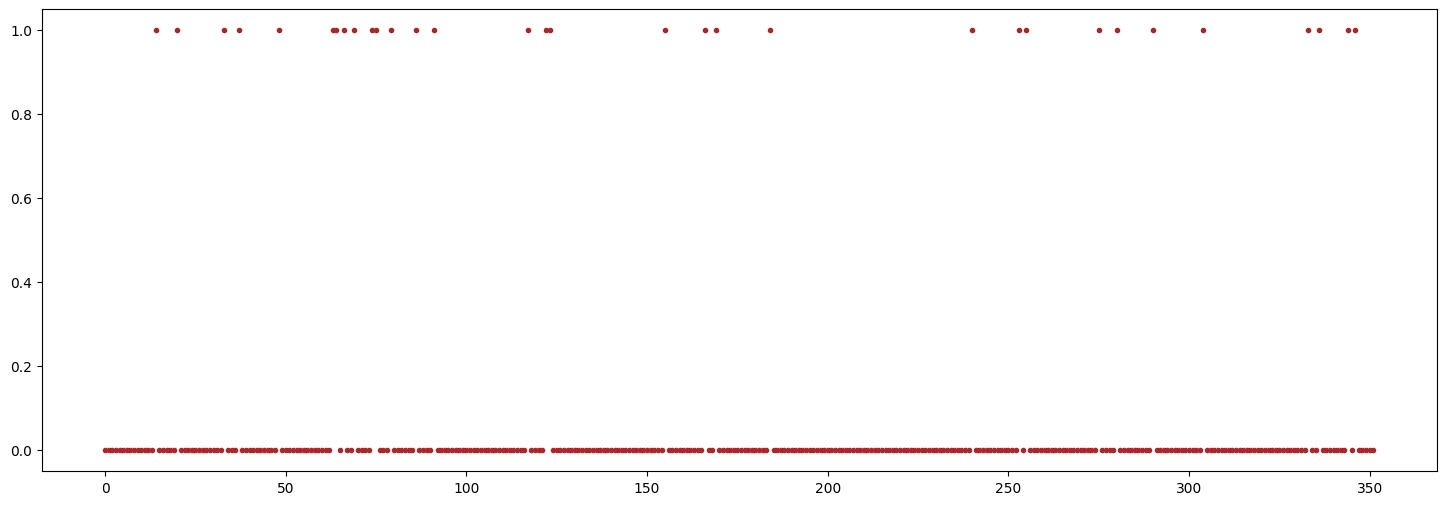

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(design_matrix["task_prompt"], label="Task Prompt", color="brown", marker='.', linestyle='None')
